In [1]:
# Import the relevant Python libraries and modules needed in this lab.

### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data

companies = pd.read_csv("./Raw_data/Unicorn_Companies.csv")
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
companies.shape

(1074, 10)

In [4]:
companies.drop_duplicates().shape

(1074, 10)

In [5]:
companies["Valuation M"] = companies["Valuation"].str.extract(r"\$([0-9]+)\s*B").astype(int)
companies.head()
companies.info()

companies = companies.sort_values(by="Valuation M",ascending = False)
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
 10  Valuation M       1074 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 92.4+ KB


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation M
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46


In [6]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

founded_year_count = companies.groupby("Year Founded", as_index = False)["Company"].count()
founded_year_count.sort_values(by = "Company",ascending = False).style.background_gradient(cmap ="Reds")

,Year Founded,Company
28,2015,155
29,2016,110
27,2014,109
25,2012,95
26,2013,87
24,2011,82
30,2017,74
31,2018,61
32,2019,45
23,2010,40


<Axes: xlabel='Year Founded', ylabel='Count'>

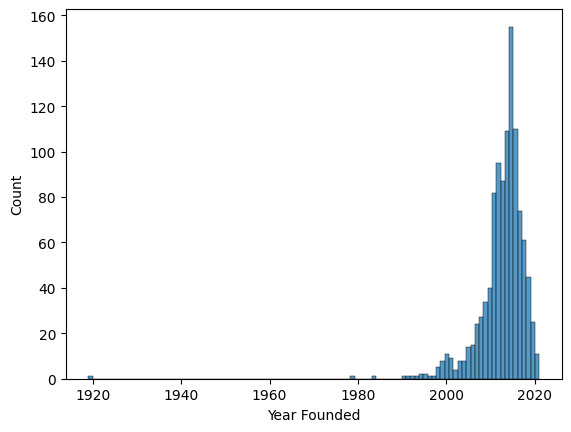

In [8]:
# Plot a histogram of the Year Founded feature.
sns.histplot(data =companies, x="Year Founded" )

In [9]:
# Convert the `Date Joined` column to datetime.

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])
companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 0 to 1068
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
 10  Valuation M       1074 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 100.7+ KB


C:\Users\aorjuela\AppData\Local\Temp\ipykernel_27184\3203489773.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])


In [10]:
# Obtain the names of the months when companies gained unicorn status.

companies["Month Joined"] = companies["Date Joined"].dt.month_name()
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation M,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180,April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100,December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100,July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95,January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46,December


In [12]:
# Determine how many years it took for companies to reach unicorn status.


companies["Year Joined"] = companies["Date Joined"].dt.year
companies["Years to Join"] = companies["Year Joined"] - companies["Year Founded"]
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation M,Month Joined,Year Joined,Years to Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180,April,2017,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100,December,2012,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100,July,2018,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95,January,2014,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46,December,2011,6


In [13]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).

most_join_year = companies.groupby("Year Joined", as_index=False)["Company"].count().sort_values(by="Company", ascending = False)
most_join_year 

,Year Joined,Company
11,2021,520
12,2022,116
10,2020,108
9,2019,104
8,2018,103
7,2017,44
5,2015,35
6,2016,21
4,2014,13
2,2012,4


In [14]:
companies_2021 = companies[ companies["Year Joined"] == 2021]
companies_2021

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation M,Month Joined,Year Joined,Years to Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",32,July,2021,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",20,April,2021,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",14,February,2021,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",13,July,2021,4
37,GoodLeap,$12B,2021-10-13,Internet software & services,Roseville,United States,North America,2003,$800M,"New Enterprise Associates, BDT Capital Partner...",12,October,2021,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Standard,$1B,2021-02-17,Artificial intelligence,San Francisco,United States,North America,2017,$239M,"CRV, Y Combinator, Initialized Capital",1,February,2021,4
1035,Stytch,$1B,2021-11-18,Cybersecurity,San Francisco,United States,North America,2020,$126M,"Index Ventures, Benchmark, Thrive Capital",1,November,2021,1
1036,Swile,$1B,2021-10-11,Fintech,Montpellier,France,Europe,2016,$326M,"Index Ventures, IDInvest Partners, Daphni",1,October,2021,5
1039,TensTorrent,$1B,2021-05-05,Artificial intelligence,Toronto,Canada,North America,2016,$235M,"Eclipse Ventures, Fidelity Investments, Moore ...",1,May,2021,5


<Axes: xlabel='Month Joined', ylabel='Company'>

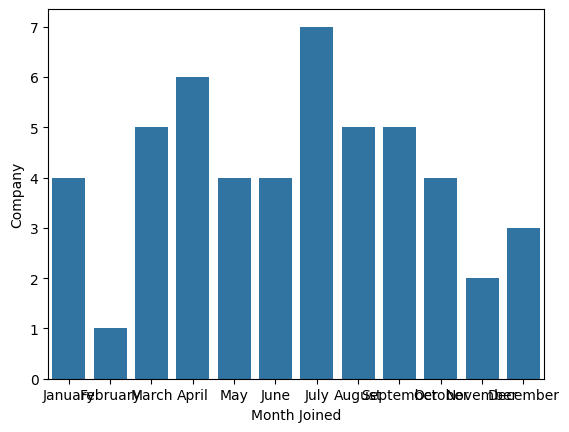

In [15]:
companies_2021.shape
companies_2021_s = companies_2021.sample(n=50)
companies_2021_s_month = companies_2021_s.groupby("Month Joined", as_index= False)["Company"].count()
companies_2021_s_month

month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

plt.Figure(figsize =(150,30))
sns.barplot( data= companies_2021_s_month,
           x = "Month Joined",
           y = "Company",
           order = month_order)

In [16]:
companies_2021_s["Week Joined"] = companies_2021_s["Date Joined"].dt.strftime("%Y-W%V")
companies_2021_s_week = companies_2021_s.groupby("Week Joined",as_index= False)["Company"].count()
companies_2021_s_week 

,Week Joined,Company
0,2021-W01,1
1,2021-W02,1
2,2021-W03,1
3,2021-W04,1
4,2021-W06,1
5,2021-W10,1
6,2021-W11,2
7,2021-W12,1
8,2021-W13,1
9,2021-W14,1


<Axes: xlabel='Week Joined', ylabel='Company'>

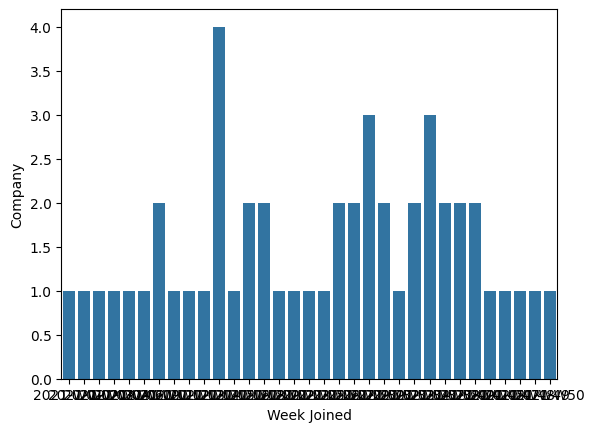

In [17]:
plt.Figure(figsize = (150,30))
sns.barplot(
    data= companies_2021_s_week,
    x = "Week Joined",
    y = "Company"
)

In [18]:
# The second year with more Companies Joining the Unicorn status was 2022 with 116

companies_2022 = companies[ companies["Year Joined"] == 2022]
companies_21_22 = pd.concat([companies_2021, companies_2022])
companies_21_22

companies_21_22_quarter = companies_21_22[["Company","Valuation M", "Date Joined"]]
companies_21_22_quarter["Q Joined"] = companies_21_22["Date Joined"].dt.to_period("Q").dt.strftime("%Y-Q%q")
companies_21_22_quarter = companies_21_22_quarter.groupby("Q Joined", as_index = False)["Valuation M"].mean()
companies_21_22_quarter

C:\Users\aorjuela\AppData\Local\Temp\ipykernel_27184\4143897787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_21_22_quarter["Q Joined"] = companies_21_22["Date Joined"].dt.to_period("Q").dt.strftime("%Y-Q%q")


,Q Joined,Valuation M
0,2021-Q1,2.750000
1,2021-Q2,2.340278
2,2021-Q3,2.291045
3,2021-Q4,1.850746
4,2022-Q1,1.716814
5,2022-Q2,2.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

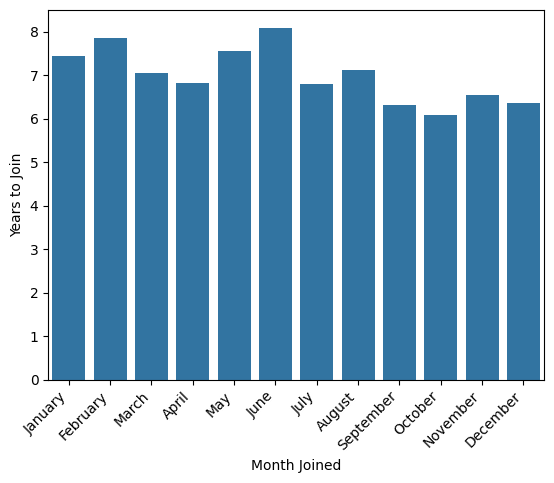

In [19]:
companies.head()
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

time_to_u_by_month_joined = companies.groupby("Month Joined",as_index = False)["Years to Join"].mean().round(2)
time_to_u_by_month_joined

plt.Figure(figsize = (150,30))
sns.barplot(
    data = time_to_u_by_month_joined,
    x = "Month Joined",
    y = "Years to Join",
    order = month_order
)

plt.xticks(rotation= 45, horizontalalignment = "right")

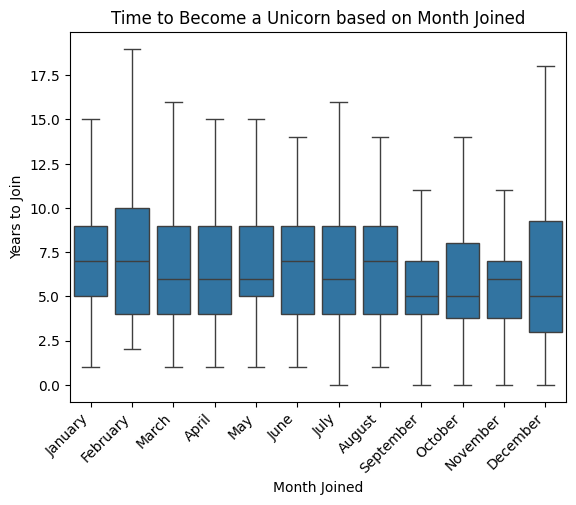

In [20]:
sns.boxplot(
    x = companies["Month Joined"],
    y = companies["Years to Join"],
    order = month_order,
    showfliers = False
)

plt.title("Time to Become a Unicorn based on Month Joined")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()


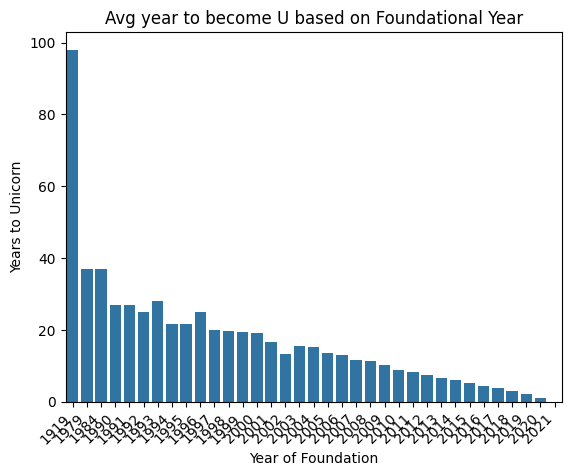

In [21]:
time_to_u_by_month_joined = companies.groupby("Year Founded",as_index = False)["Years to Join"].mean().round(2)

sns.barplot(
    data = time_to_u_by_month_joined,
    x = "Year Founded",
    y = "Years to Join",
)

plt.title("Avg year to become U based on Foundational Year")
plt.xlabel("Year of Foundation")
plt.ylabel("Years to Unicorn")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

C:\Users\aorjuela\AppData\Local\Temp\ipykernel_27184\1681326760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_q["Q Joined"] = companies_q["Date Joined"].dt.to_period("Q").dt.strftime("%Y-Q%q")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, '2007-Q3'),
  Text(1, 0, '2011-Q2'),
  Text(2, 0, '2011-Q4'),
  Text(3, 0, '2012-Q1'),
  Text(4, 0, '2012-Q2'),
  Text(5, 0, '2012-Q4'),
  Text(6, 0, '2013-Q1'),
  Text(7, 0, '2013-Q2'),
  Text(8, 0, '2013-Q4'),
  Text(9, 0, '2014-Q1'),
  Text(10, 0, '2014-Q2'),
  Text(11, 0, '2014-Q3'),
  Text(12, 0, '2014-Q4'),
  Text(13, 0, '2015-Q1'),
  Text(14, 0, '2015-Q2'),
  Text(15, 0, '2015-Q3'),
  Text(16, 0, '2015-Q4'),
  Text(17, 0, '2016-Q1'),
  Text(18, 0, '2016-Q2'),
  Text(19, 0, '2016-Q3'),
  Text(20, 0, '2016-Q4'),
  Text(21, 0, '2017-Q1'),
  Text(22, 0, '2017-Q2'),
  Text(23, 0, '2017-Q3'),
  Text(24, 0, '2017-Q4'),
  Text(25, 0, '2018-Q1'),
  Text(26, 0, '2018-Q2'),
  Text(27, 0, '2018-Q3'),
  Text(28, 0, '2018-Q4'),
  Text(

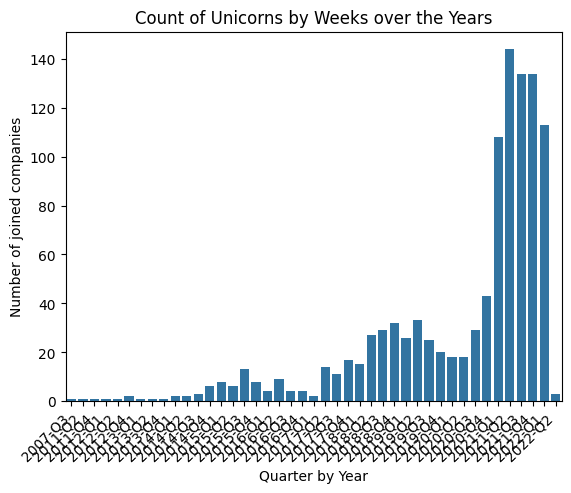

In [22]:
companies

companies_q = companies[["Company","Valuation M","Date Joined"]]
companies_q["Q Joined"] = companies_q["Date Joined"].dt.to_period("Q").dt.strftime("%Y-Q%q")

#companies_q["Q Joined"] = companies_q["Date Joined"].dt.to_period("Q").dt.strftime("%q")
#companies_q["Y Joined"] = companies_q["Date Joined"].dt.year
companies_q

#count_byQ = companies_q.groupby(["Y Joined","Q Joined"], as_index=False)["Company"].count()
count_byQ = companies_q.groupby(["Q Joined"], as_index=False)["Company"].count()
count_byQ

plt.Figure(figsize = (150,100))
sns.barplot(
    data= count_byQ,
    x="Q Joined",
    y="Company"
)

plt.xlabel("Quarter by Year")
plt.ylabel("Number of joined companies")
plt.title("Count of Unicorns by Weeks over the Years")
plt.xticks(rotation = 45, horizontalalignment = "right")

<Axes: xlabel='Q', ylabel='Valuation M'>

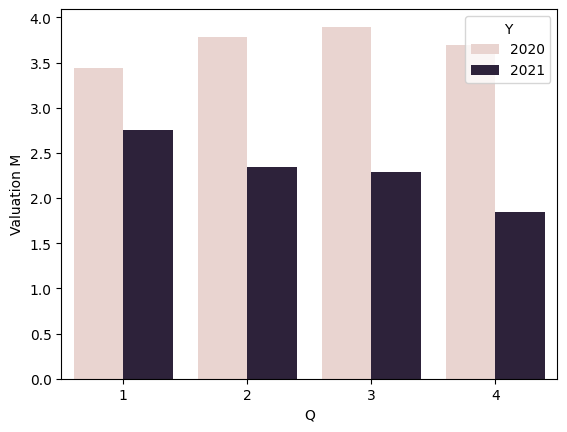

In [23]:
companies_q = companies_q[ companies_q["Date Joined"].dt.year.isin([2020,2021])]
companies_q["Y"] = companies_q["Date Joined"].dt.year
companies_q["Q"] = companies_q["Date Joined"].dt.to_period("Q").dt.strftime("%q")
companies_q_grp = companies_q.groupby(["Y","Q"],as_index=False)["Valuation M"].mean()


sns.barplot(
    data= companies_q_grp,
    x= "Q",
    y="Valuation M",
    hue="Y"
)
